<a href="https://colab.research.google.com/github/Deinbi/TelecomX_Challenge/blob/main/WalterMancuso_TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📄Informe

##Conclusiones Relevantes del Análisis

###1. Los clientes que cancelan tienen patrones distintos
Suelen tener menos meses contratados, lo que sugiere una cancelación temprana.

Tienden a tener cobros mensuales más altos, lo que puede reflejar una sensibilidad al precio.

En algunos casos, **tienen Gasto_Total bajo por baja permanencia, pero Cobro_Mensual elevado** por costo percibido alto en poco tiempo.

###2. El gasto mensual y diario se relacionan con el abandono
clientes con mayor gasto diario, muestran una leve mayor propensión al churn.

Esto sugiere que una percepción de alto costo diario puede incidir en la decisión de cancelar, especialmente si no hay permanencia larga.

###3. El tipo de contrato es un factor determinante contratos "Month-to-month" presentan una tasa de cancelación significativamente más alta.

Este grupo debe ser analizado o tratado como "de riesgo".

###4. Distribuciones numéricas muestran insights valiosos,
Gasto_Total tiene una amplia dispersión: algunos clientes con montos muy altos (leales), otros con montos bajos (nuevos o recién cancelados).

Cobro Mensual tiende a concentrarse en rangos medios-altos, pero con outliers.

Meses contratados tiene acumulación en valores bajos y en máximos, indicando dos perfiles: clientes nuevos vs clientes fieles.

###5. Transformaciones y limpieza fueron críticas, el tratamiento de nulos,
blancos y el renombrado de columnas fue clave para hacer el dataset interpretable y apto para análisis visual.

###6. A considerar, que los valores vacios como clientes_cancelados = No,
fueron  interpretados en base a que los contratos son mes a mes, por lo que en el momento del analisis, talvez no estaban activos en el momento y alternan su actividad mes a mes segun sus necesidades. Detectar y conservar registros incompletos pero valiosos (como contratos mes a mes con blancos) fue una buena decisión de negocio.

###7. A futuro, propongo analizar el Metodo_Pago
(electronic check vs automático) como otra posible causa de churn.

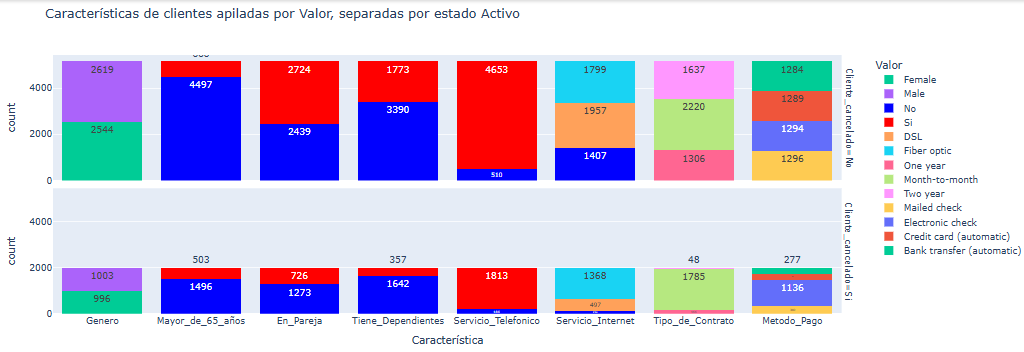

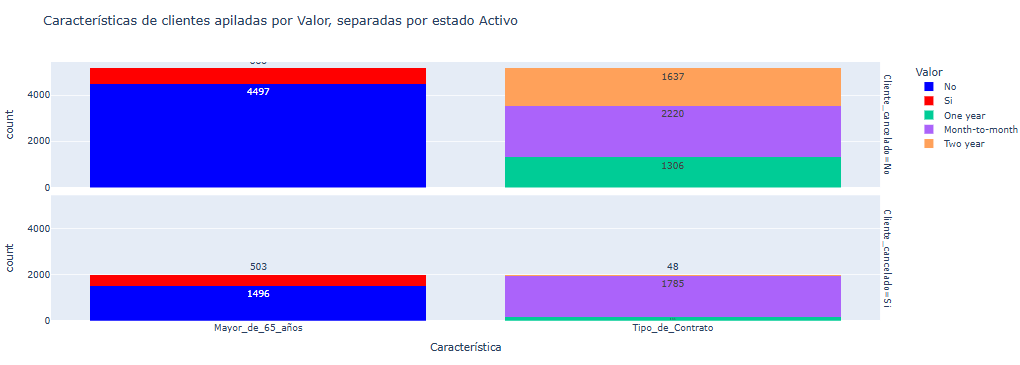

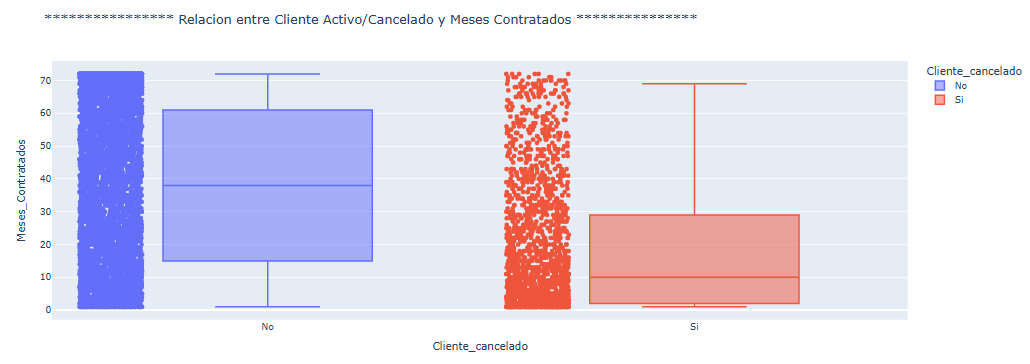

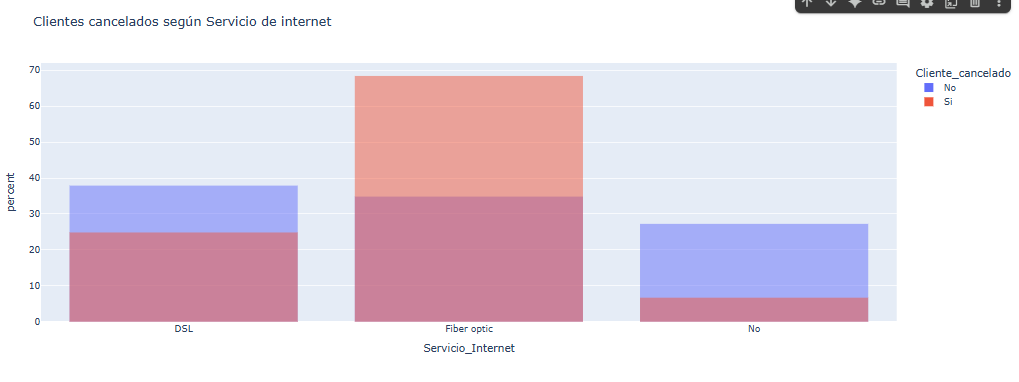

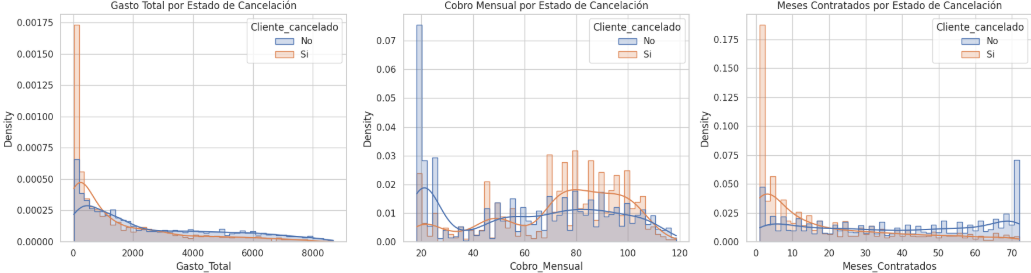

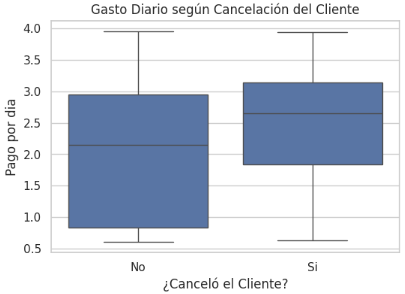

#📌 Extracción

Subo API al drive para asegurarme disponibilidad:

https://drive.google.com/drive/folders/1bmZem_erWEUn_E1Kq8Bsj9Cu1vr1QRsU?usp=sharing

Dejo el acceso publico para su evaluación.

## Resuelvo la extraccion como aprendimos en el ultumo curso de ALURA.

In [404]:
import pandas as pd
url = '/content/drive/MyDrive/Oracle ONE 8 /Challenge Telecom X/TelecomX_Data.json'
datos = pd.read_json(url)
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


Encuentro diccionarios dentro del json así que comienzo su normalización.

In [405]:
customer=pd.json_normalize(datos['customer'])
phone=pd.json_normalize(datos['phone'])
internet=pd.json_normalize(datos['internet'])
account=pd.json_normalize(datos['account'])


In [406]:
customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [407]:
phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [408]:
internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [409]:
account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


No veo mas diccionarios anidados ni listas, por lo que doy por finalizada la tarea de extracción.

In [410]:
print(datos.shape)
print(customer.shape)
print(phone.shape)
print(internet.shape)
print(account.shape)
print('ID duplicados: ',datos['customerID'].duplicated().sum(),' en los datos suministrados')

(7267, 6)
(7267, 5)
(7267, 2)
(7267, 7)
(7267, 5)
ID duplicados:  0  en los datos suministrados


##Resolviendolo como lo vimos en la mentoria del Challenge:

In [411]:
import json
with open('/content/drive/MyDrive/Oracle ONE 8 /Challenge Telecom X/TelecomX_Data.json', 'r', encoding='utf-8') as f:
    datos = json.load(f)
df_normal = json_normalize(datos)
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

### Verificamos los datos unicos guardados en cada columna.

In [412]:
for col in df_normal.columns:
    print(col)
    print(df_normal[col].unique())

customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn
['No' 'Yes' '']
customer.gender
['Female' 'Male']
customer.SeniorCitizen
[0 1]
customer.Partner
['Yes' 'No']
customer.Dependents
['Yes' 'No']
customer.tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
phone.PhoneService
['Yes' 'No']
phone.MultipleLines
['No' 'Yes' 'No phone service']
internet.InternetService
['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity
['No' 'Yes' 'No internet service']
internet.OnlineBackup
['Yes' 'No' 'No internet service']
internet.DeviceProtection
['No' 'Yes' 'No internet service']
internet.TechSupport
['Yes' 'No' 'No internet service']
internet.StreamingTV
['Yes' 'No' 'No internet service']
internet.StreamingMovies
['No' 'Yes' 'No internet service']
account.Contract
['One year' 'M

### Verificamos si hay valores duplicados

In [413]:
duplicados = df_normal[df_normal.duplicated()]
print(duplicados)

Empty DataFrame
Columns: [customerID, Churn, customer.gender, customer.SeniorCitizen, customer.Partner, customer.Dependents, customer.tenure, phone.PhoneService, phone.MultipleLines, internet.InternetService, internet.OnlineSecurity, internet.OnlineBackup, internet.DeviceProtection, internet.TechSupport, internet.StreamingTV, internet.StreamingMovies, account.Contract, account.PaperlessBilling, account.PaymentMethod, account.Charges.Monthly, account.Charges.Total]
Index: []

[0 rows x 21 columns]


###Revisamos si hay valores nulos (Nan)

In [414]:
nulos = df_normal.isnull().sum()
print(nulos)

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


### Valores vacios (en blanco)

In [415]:
valores_en_blanco = df_normal.apply(lambda x: x.astype(str).str.strip()=='').sum()
print(valores_en_blanco)

customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total         11
dtype: int64


In [416]:
df_como_str = df_normal.astype(str)
df_sin_espacios = df_como_str.applymap(lambda x: x.strip())
df_blancos = df_sin_espacios == ''
filas_con_blancos = df_normal[df_blancos.any(axis=1)].copy()
filas_con_blancos_ordenadas = filas_con_blancos.sort_values(
    by="account.Charges.Total", ascending=False
)
filas_con_blancos_ordenadas.head(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
4411,6037-WPJRP,,Female,0,No,No,13,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Mailed check,75.0,999.45
540,0769-WXZYU,,Male,0,No,No,34,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),26.1,980.35
2245,3134-JCVOE,,Female,0,No,No,3,No,No phone service,DSL,...,Yes,No,No,No,No,Month-to-month,No,Mailed check,29.2,98.5
3207,4477-QAXWD,,Male,0,Yes,No,25,No,No phone service,DSL,...,No,Yes,No,Yes,No,One year,Yes,Credit card (automatic),38.1,970.4
7049,9708-TKNTZ,,Female,0,Yes,Yes,6,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.7,94.45


Los vacios son solo el 3% de los datos aportados.

In [417]:
# Contar cuántos valores "Month-to-month" hay en 'account.Contract'
cantidad_month_to_month = (filas_con_blancos_ordenadas["account.Contract"] == "Month-to-month").sum()
print("Cantidad de contratos Month-to-month:", cantidad_month_to_month)

Cantidad de contratos Month-to-month: 130


In [418]:
cantidad_cargos_vacios = filas_con_blancos_ordenadas["account.Charges.Total"].astype(str).str.strip().eq('').sum()
print("Cantidad de valores vacíos en account.Charges.Total:", cantidad_cargos_vacios)

Cantidad de valores vacíos en account.Charges.Total: 11


Conclusion: De los 224 clientes que no indican Si son o No son clientes actuales (al menos al momento de generar la api y exportanos el json), 130 tienen contratos mes a mes... Ademas, los 11 indicados como en blanco en cuanto es el pago total, estan incluidos en estos 130.

Por lo que a mi respecta, no dejan de ser clientes por un mes que no estan utilizando el servicio (y por ello no realizaron el pago) y suena logico  que no tengan un contrato anual, si no utilizan el servicio con regularidad.

Yo NO dejaria de contabilizarlos como clientes.

Si eliminaria de la evaluacion, aquellos que tienen contratos anuales y no figuran como clientes activos o inactivos.

Segun se dijo en la segunda mentoria, este valor no va a inferir en el resultado, es por ello que en mi caso decidi hacer la experiencia, incluyendo a esta poblacion de clientes que pagan solo el mes que lo usan.


#🔧 Transformación

In [419]:
# Convertir todo a string y eliminar espacios
df_como_str = df_normal.astype(str)
df_sin_espacios = df_como_str.applymap(lambda x: x.strip())

# Identificar celdas vacías
df_blancos = df_sin_espacios == ''

# Máscara para filas con al menos un blanco
filas_con_blanco = df_blancos.any(axis=1)

# Máscara para las que NO son 'Month-to-month'
contrato_no_month = df_sin_espacios["account.Contract"] != "Month-to-month"

# Filas a eliminar: tienen blanco y NO son 'Month-to-month'
filas_a_eliminar = filas_con_blanco & contrato_no_month

# Crear nuevo DataFrame eliminando esas filas
df_limpio = df_normal[~filas_a_eliminar].copy()

# Resultado
print("Filas originales:", len(df_normal))
print("Filas eliminadas:", filas_a_eliminar.sum())
print("Filas finales:", len(df_limpio))

Filas originales: 7267
Filas eliminadas: 105
Filas finales: 7162


## Nuevo DataFrame: df_limpio

In [420]:
df_limpio.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### Aun quedan los 130 valores en blanco de los 224 originales



In [421]:
valores_en_blanco = df_limpio.apply(lambda x: x.astype(str).str.strip()=='').sum()
print(valores_en_blanco)

customerID                     0
Churn                        130
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total          0
dtype: int64


Y como mi posicion es que son clientes eventuales, los completo con Yes

In [422]:
df_limpio["Churn"] = df_limpio["Churn"].astype(str).apply(lambda x: "Yes" if x.strip() == "" else x.strip())
# Contar cuántos valores fueron reemplazados
cantidad_reemplazos = df_limpio["Churn"].astype(str).str.strip().eq("").sum()
print("Cantidad de valores vacíos reemplazados en 'Churn':", cantidad_reemplazos)


Cantidad de valores vacíos reemplazados en 'Churn': 0


Verifico que no quede nada vacio

In [423]:
cantidad_cargos_vacios = df_limpio["account.Charges.Total"].astype(str).str.strip().eq('').sum()
print("Cantidad de valores vacíos en 'account.Charges.Total':", cantidad_cargos_vacios)

Cantidad de valores vacíos en 'account.Charges.Total': 0


##Verifico cambios e inconsistencias

In [424]:
for col in df_limpio.columns:
    print(col)
    print(df_limpio[col].unique())

customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn
['No' 'Yes']
customer.gender
['Female' 'Male']
customer.SeniorCitizen
[0 1]
customer.Partner
['Yes' 'No']
customer.Dependents
['Yes' 'No']
customer.tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
phone.PhoneService
['Yes' 'No']
phone.MultipleLines
['No' 'Yes' 'No phone service']
internet.InternetService
['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity
['No' 'Yes' 'No internet service']
internet.OnlineBackup
['Yes' 'No' 'No internet service']
internet.DeviceProtection
['No' 'Yes' 'No internet service']
internet.TechSupport
['Yes' 'No' 'No internet service']
internet.StreamingTV
['Yes' 'No' 'No internet service']
internet.StreamingMovies
['No' 'Yes' 'No internet service']
account.Contract
['One year' 'Month-to

### Revisamos validez de los datos

In [425]:
df_limpio['account.Charges.Total']=pd.to_numeric(df_limpio['account.Charges.Total'],errors='coerce')
df_limpio['account.Charges.Total'].dtype


dtype('float64')

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

In [426]:
df_limpio['Cuentas_Diarias']=df_limpio['account.Charges.Monthly']/30
print(df_limpio[['account.Charges.Monthly','Cuentas_Diarias']])
df_limpio['Cuentas_Diarias']

      account.Charges.Monthly  Cuentas_Diarias
0                       65.60         2.186667
1                       59.90         1.996667
2                       73.90         2.463333
3                       98.00         3.266667
4                       83.90         2.796667
...                       ...              ...
7262                    55.15         1.838333
7263                    85.10         2.836667
7264                    50.30         1.676667
7265                    67.85         2.261667
7266                    59.00         1.966667

[7162 rows x 2 columns]


,Cuentas_Diarias
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


In [427]:
df_limpio.describe()


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7162.000000,7162.000000,7162.000000,7162.000000,7162.000000
mean,0.163223,32.138369,64.797117,2265.302527,2.159904
std,0.369594,24.522400,30.048613,2261.160278,1.001620
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.750000,390.512500,1.191667
50%,0.000000,28.000000,70.350000,1386.850000,2.345000
75%,0.000000,55.000000,89.850000,3759.050000,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [428]:
df_limpio.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


customerID

##Por pedido del equipo de TelecomX

La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [429]:
#Columna 1
df_limpio = df_limpio.rename(columns={"customerID": "ID_Cliente"})
#Columna 2
df_limpio = df_limpio.rename(columns={"Churn": "Cliente_cancelado"})
#Columna 3
df_limpio = df_limpio.rename(columns={"customer.gender":"Genero"})
#Columna 4
df_limpio = df_limpio.rename(columns={"customer.SeniorCitizen":"Mayor_de_65_años"})
#Columna 5
df_limpio = df_limpio.rename(columns={"customer.Partner":"En_Pareja"})
#Columna 6
df_limpio = df_limpio.rename(columns={"customer.Dependents":"Tiene_Dependientes"})
#Columna 7
df_limpio = df_limpio.rename(columns={"customer.tenure":"Meses_Contratados"})
#Columna 8
df_limpio = df_limpio.rename(columns={"phone.PhoneService":"Servicio_Telefonico"})
#Columna 9
df_limpio = df_limpio.rename(columns={"phone.MultipleLines":"Multiples_Lineas"})
#Columna 10
df_limpio = df_limpio.rename(columns={"internet.InternetService":"Servicio_Internet"})
#Columna 11
df_limpio = df_limpio.rename(columns={"internet.OnlineSecurity":"Seguridad_Online"})
#Columna 12
df_limpio = df_limpio.rename(columns={"internet.OnlineBackup":"Backup_Online"})
#Columna 13
df_limpio = df_limpio.rename(columns={"internet.DeviceProtection":"Proteccion_Dispositivos"})
#Columna 14
df_limpio = df_limpio.rename(columns={"internet.TechSupport":"Soporte_Tecnico"})
#Columna 15
df_limpio = df_limpio.rename(columns={"internet.StreamingTV":"Streaming_TV"})
#Columna 16
df_limpio = df_limpio.rename(columns={"internet.StreamingMovies":"Streaming_Peliculas"})
#Columna 17
df_limpio = df_limpio.rename(columns={"account.Contract":"Tipo_de_Contrato"})
#Columna 18
df_limpio = df_limpio.rename(columns={"account.PaperlessBilling":"Facturacion_Electronica"})
#Columna 19
df_limpio = df_limpio.rename(columns={"account.PaymentMethod":"Metodo_Pago"})
#Columna 20
df_limpio = df_limpio.rename(columns={"account.Charges.Monthly":"Cobro_Mensual"})
#Columna 21
df_limpio = df_limpio.rename(columns={"account.Charges.Total":"Gasto_Total"})

df_limpio.head()


,ID_Cliente,Cliente_cancelado,Genero,Mayor_de_65_años,En_Pareja,Tiene_Dependientes,Meses_Contratados,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Proteccion_Dispositivos,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_de_Contrato,Facturacion_Electronica,Metodo_Pago,Cobro_Mensual,Gasto_Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [430]:
for col in df_limpio.columns:
    print(col)
    print(df_limpio[col].unique())

ID_Cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Cliente_cancelado
['No' 'Yes']
Genero
['Female' 'Male']
Mayor_de_65_años
[0 1]
En_Pareja
['Yes' 'No']
Tiene_Dependientes
['Yes' 'No']
Meses_Contratados
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
Servicio_Telefonico
['Yes' 'No']
Multiples_Lineas
['No' 'Yes' 'No phone service']
Servicio_Internet
['DSL' 'Fiber optic' 'No']
Seguridad_Online
['No' 'Yes' 'No internet service']
Backup_Online
['Yes' 'No' 'No internet service']
Proteccion_Dispositivos
['No' 'Yes' 'No internet service']
Soporte_Tecnico
['Yes' 'No' 'No internet service']
Streaming_TV
['Yes' 'No' 'No internet service']
Streaming_Peliculas
['No' 'Yes' 'No internet service']
Tipo_de_Contrato
['One year' 'Month-to-month' 'Two year']
Facturacion_Electronica
['Yes' 'N

In [431]:
# Lista de columnas a modificar
columnas_objetivo = [
    "Cliente_cancelado", "Mayor_de_65_años", "En_Pareja", "Tiene_Dependientes",
    "Servicio_Telefonico", "Multiples_Lineas", "Servicio_Internet",
    "Proteccion_Dispositivos", "Soporte_Tecnico", "Streaming_TV",
    "Streaming_Peliculas", "Facturacion_Electronica"
]

# Aplicar los reemplazos solo en esas columnas
df_limpio[columnas_objetivo] = df_limpio[columnas_objetivo].applymap(lambda x:
    "Si" if str(x).strip() in ["Yes", "1"] else
    "No" if str(x).strip() == "0" else
    str(x).strip()
)

df_limpio.head()

/tmp/ipython-input-431-275856857.py:10: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,ID_Cliente,Cliente_cancelado,Genero,Mayor_de_65_años,En_Pareja,Tiene_Dependientes,Meses_Contratados,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Proteccion_Dispositivos,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_de_Contrato,Facturacion_Electronica,Metodo_Pago,Cobro_Mensual,Gasto_Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,No,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,One year,Si,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,No,No,No,9,Si,Si,DSL,...,No,No,No,Si,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Si,Male,No,No,No,4,Si,No,Fiber optic,...,Si,No,No,No,Month-to-month,Si,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Si,Male,Si,Si,No,13,Si,No,Fiber optic,...,Si,No,Si,Si,Month-to-month,Si,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Si,Female,Si,Si,No,3,Si,No,Fiber optic,...,No,Si,Si,No,Month-to-month,Si,Mailed check,83.9,267.40,2.796667


In [432]:
for col in df_limpio.columns:
    print(col)
    print(df_limpio[col].unique())

ID_Cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Cliente_cancelado
['No' 'Si']
Genero
['Female' 'Male']
Mayor_de_65_años
['No' 'Si']
En_Pareja
['Si' 'No']
Tiene_Dependientes
['Si' 'No']
Meses_Contratados
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
Servicio_Telefonico
['Si' 'No']
Multiples_Lineas
['No' 'Si' 'No phone service']
Servicio_Internet
['DSL' 'Fiber optic' 'No']
Seguridad_Online
['No' 'Yes' 'No internet service']
Backup_Online
['Yes' 'No' 'No internet service']
Proteccion_Dispositivos
['No' 'Si' 'No internet service']
Soporte_Tecnico
['Si' 'No' 'No internet service']
Streaming_TV
['Si' 'No' 'No internet service']
Streaming_Peliculas
['No' 'Si' 'No internet service']
Tipo_de_Contrato
['One year' 'Month-to-month' 'Two year']
Facturacion_Electronica
['Si' 'No']


#📊 Carga y análisis

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [433]:
df_limpio.describe()

,Meses_Contratados,Cobro_Mensual,Gasto_Total,Cuentas_Diarias
count,7162.000000,7162.000000,7162.000000,7162.000000
mean,32.138369,64.797117,2265.302527,2.159904
std,24.522400,30.048613,2261.160278,1.001620
min,1.000000,18.250000,18.800000,0.608333
25%,9.000000,35.750000,390.512500,1.191667
50%,28.000000,70.350000,1386.850000,2.345000
75%,55.000000,89.850000,3759.050000,2.995000
max,72.000000,118.750000,8684.800000,3.958333


En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [434]:
import plotly.express as px
px.histogram(df_limpio,x='Genero',text_auto=True,color='Cliente_cancelado',title="Relación entre clientes activos y genero",barmode='group')


In [435]:
import plotly.express as px
# Caracteristicas que quiero analizar en un solo grafico
caracteristicas = [
    "Genero","Mayor_de_65_años", "En_Pareja", "Tiene_Dependientes",
    "Servicio_Telefonico", "Servicio_Internet","Tipo_de_Contrato","Metodo_Pago"

]
df_melted = pd.melt(
    df_limpio,
    id_vars="Cliente_cancelado",
    value_vars=caracteristicas,
    var_name="Característica",
    value_name="Valor"
)
df_si = df_melted[df_melted["Valor"] == "Si"]


fig = px.histogram(
    df_melted,
    x="Característica",
    color="Valor",              # Colores para Si / No
    facet_row="Cliente_cancelado",         # Separar por estado Activo (horizontalmente)
    barmode="stack",            # Apilar Si/No dentro de cada categoría
    text_auto=True,
    title="Características de clientes apiladas por Valor, separadas por estado Activo",
    color_discrete_map={"Si": "red", "No": "blue"}
)

# Opcional: Ajustar espacio entre gráficos y ancho visual
fig.update_layout(
    bargap=0.1,
    bargroupgap=0.1
)

fig.show()

El Metodo de pago no influye, al igual que el genero y el servicio que consumen.

In [436]:
import plotly.express as px
# Caracteristicas que quiero analizar en un solo grafico
caracteristicas = [
    "Mayor_de_65_años", "En_Pareja", "Tiene_Dependientes",
    "Tipo_de_Contrato"

]
df_melted = pd.melt(
    df_limpio,
    id_vars="Cliente_cancelado",
    value_vars=caracteristicas,
    var_name="Característica",
    value_name="Valor"
)
df_si = df_melted[df_melted["Valor"] == "Si"]


fig = px.histogram(
    df_melted,
    x="Característica",
    color="Valor",              # Colores para Si / No
    facet_row="Cliente_cancelado",         # Separar por estado Activo (horizontalmente)
    barmode="stack",            # Apilar Si/No dentro de cada categoría
    text_auto=True,
    title="Características de clientes apiladas por Valor, separadas por estado Activo",
    color_discrete_map={"Si": "red", "No": "blue"}
)

# Opcional: Ajustar espacio entre gráficos y ancho visual
fig.update_layout(
    bargap=0.1,
    bargroupgap=0.1
)

fig.show()

## Evaluacion primaria de los datos categoricos:

Aca podemos ver claramente que los inactivos rondan los 2000 clientes y los activos 5000.

Que en cuanto a las caracteristicas del cliente:

  * Hay una fuerte relacion entre los clientes inactivos y la edad del cliente.

  * De los clientes activos, ademas hay una relacion 5 a 1 de los que No tienen dependientes a los que Si.

  * Fuertemente influenciado por el tipo de contrato.
  
### Podemos concluir que de los clientes activos, el perfil preferente es menor a 65 años y No tiene dependientes.

###De los clientes inactivos, podemos verificar que hay un gran porcentajes por los contratos mes a mes.

Recomendaria en el informe, realizar campañas de marketing para llegar a mayores las edades, con promociones a mayores de 65 años (edad jubilatoria en muchos paises). Otra relacion que genera oportunidades, es dar beneficios a los contratos a largo plazo, de manera de poder ganar mayor cantidad de clientes asegurandolos a cambio de un descuento promocional y evitando que se muden a la competencia. Ademas, ganariamos fidelidad y prevision a largo plazo al negocio.


In [437]:
import plotly.express as px
# Caracteristicas que quiero analizar en un solo grafico
caracteristicas = [
    "Mayor_de_65_años","Tipo_de_Contrato"

]
df_melted = pd.melt(
    df_limpio,
    id_vars="Cliente_cancelado",
    value_vars=caracteristicas,
    var_name="Característica",
    value_name="Valor"
)
df_si = df_melted[df_melted["Valor"] == "Si"]


fig = px.histogram(
    df_melted,
    x="Característica",
    color="Valor",              # Colores para Si / No
    facet_row="Cliente_cancelado",         # Separar por estado Activo (horizontalmente)
    barmode="stack",            # Apilar Si/No dentro de cada categoría
    text_auto=True,
    title="Características de clientes apiladas por Valor, separadas por estado Activo",
    color_discrete_map={"Si": "red", "No": "blue"}
)

# Opcional: Ajustar espacio entre gráficos y ancho visual
fig.update_layout(
    bargap=0.1,
    bargroupgap=0.1
)

fig.show()

In [438]:
cantidad_si = (df_limpio['Cliente_cancelado'] == "Si").sum()
print("Cantidad de clientes cancelados:", cantidad_si)
promedio_meses_cancelados = df_limpio[df_limpio['Cliente_cancelado'] == "Si"]['Meses_Contratados'].mean()
print("Promedio de meses contratados de clientes cancelados:", promedio_meses_cancelados)
Max_meses_cancelados = df_limpio[df_limpio['Cliente_cancelado'] == "Si"]['Meses_Contratados'].max()
print("Maximo de meses contratados de clientes cancelados:", Max_meses_cancelados )
Min_meses_cancelados = df_limpio[df_limpio['Cliente_cancelado'] == "Si"]['Meses_Contratados'].min()
print("Maximo de meses contratados de clientes cancelados:", Min_meses_cancelados )

cantidad_No = (df_limpio['Cliente_cancelado'] == "No").sum()
print("Cantidad de clientes cancelados:", cantidad_No)
promedio_meses = df_limpio[df_limpio['Cliente_cancelado'] == "No"]['Meses_Contratados'].mean()
print("Promedio de meses contratados de clientes:", promedio_meses)
Max_meses = df_limpio[df_limpio['Cliente_cancelado'] == "No"]['Meses_Contratados'].max()
print("Maximo de meses contratados de clientes:", Max_meses)
Min_meses = df_limpio[df_limpio['Cliente_cancelado'] == "No"]['Meses_Contratados'].min()
print("Maximo de meses contratados de clientes", Min_meses)

Cantidad de clientes cancelados: 1999
Promedio de meses contratados de clientes cancelados: 17.90295147573787
Maximo de meses contratados de clientes cancelados: 72
Maximo de meses contratados de clientes cancelados: 1
Cantidad de clientes cancelados: 5163
Promedio de meses contratados de clientes: 37.65000968429208
Maximo de meses contratados de clientes: 72
Maximo de meses contratados de clientes 1


In [439]:
px.box(df_limpio,x='Cliente_cancelado',y='Meses_Contratados',title='**************** Relacion entre Cliente Activo/Cancelado y Meses Contratados ***************',color='Cliente_cancelado',points="all" )


In [440]:
df = df_limpio
fig = px.histogram(df,histnorm="percent" ,x="Servicio_Internet", color="Cliente_cancelado", barmode="overlay",title="Clientes cancelados según Servicio de internet")
fig.show()

In [441]:
fig = px.histogram(df, x="Servicio_Telefonico", color="Cliente_cancelado", barmode="overlay",title="Clientes cancelados según Servicio telefonicos")
fig.show()

## Evaluacion primaria de campos numericos:

In [442]:
df_limpio["Gasto_Total"] = pd.to_numeric(df_limpio["Gasto_Total"], errors='coerce')
df_limpio["Cobro_Mensual"] = pd.to_numeric(df_limpio["Cobro_Mensual"], errors='coerce')

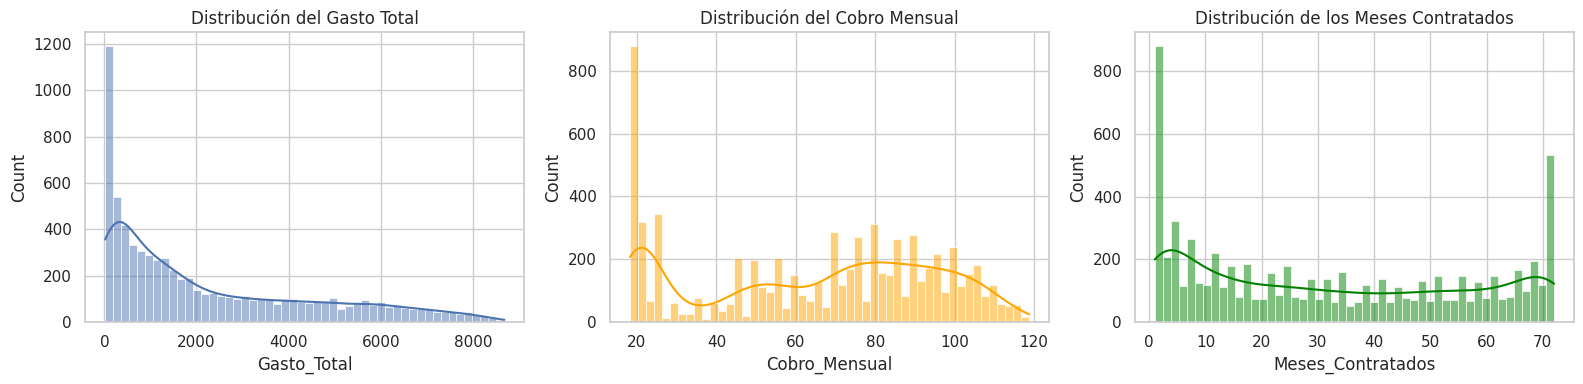

In [443]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general
sns.set(style="whitegrid")
plt.figure(figsize=(16, 4))

# Gasto Total
plt.subplot(1, 3, 1)
sns.histplot(df_limpio["Gasto_Total"], bins=50, kde=True)
plt.title("Distribución del Gasto Total")

# Cobro Mensual
plt.subplot(1, 3, 2)
sns.histplot(df_limpio["Cobro_Mensual"], bins=50, kde=True, color='orange')
plt.title("Distribución del Cobro Mensual")

# Meses Contratados
plt.subplot(1, 3, 3)
sns.histplot(df_limpio["Meses_Contratados"], bins=50, kde=True, color='green')
plt.title("Distribución de los Meses Contratados")

plt.tight_layout()
plt.show()

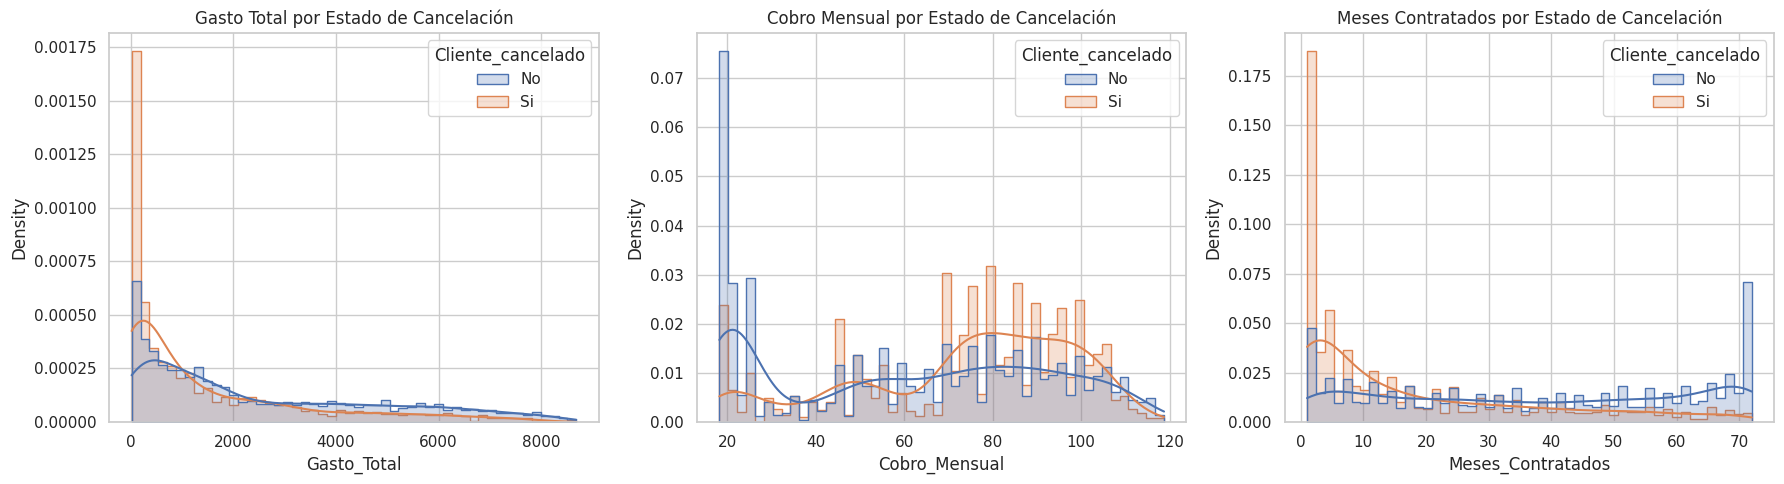

In [444]:
plt.figure(figsize=(18, 5))

# Gasto Total
plt.subplot(1, 3, 1)
sns.histplot(data=df_limpio, x="Gasto_Total", hue="Cliente_cancelado", bins=50, kde=True, element="step", stat="density", common_norm=False)
plt.title("Gasto Total por Estado de Cancelación")

# Cobro Mensual
plt.subplot(1, 3, 2)
sns.histplot(data=df_limpio, x="Cobro_Mensual", hue="Cliente_cancelado", bins=50, kde=True, element="step", stat="density", common_norm=False)
plt.title("Cobro Mensual por Estado de Cancelación")

# Meses Contratados
plt.subplot(1, 3, 3)
sns.histplot(data=df_limpio, x="Meses_Contratados", hue="Cliente_cancelado", bins=50, kde=True, element="step", stat="density", common_norm=False)
plt.title("Meses Contratados por Estado de Cancelación")

plt.tight_layout()
plt.show()

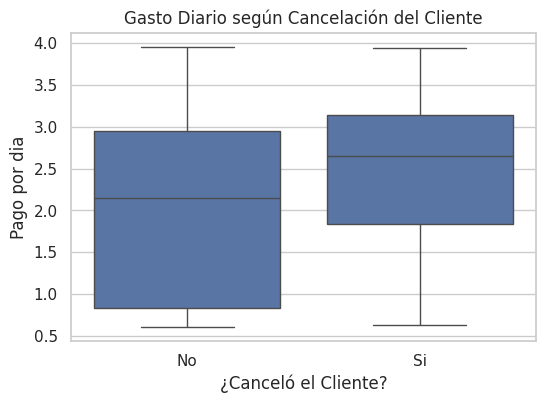

In [445]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Cliente_cancelado", y="Cuentas_Diarias", data=df_limpio)
plt.title("Gasto Diario según Cancelación del Cliente")
plt.ylabel("Pago por dia")
plt.xlabel("¿Canceló el Cliente?")
plt.show()